# Setup & get data

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('axes', labelsize=30)
mpl.rc('font', size=30)
mpl.rc('xtick', labelsize=22)
mpl.rc('ytick', labelsize=22)
from prophet import Prophet
from sklearn.model_selection import train_test_split
%run -i ../scripts/pandas_startup.py

In [14]:
daily_incidents=pd.read_csv("../data/daily_incidents_clean.csv", index_col=None)

In [26]:
daily_incidents = daily_incidents[["ds", "y"]]

# Split data into training and validation (i.e., "test") sets

Make validation set as latest / most recent days.

In [27]:
validation_window = 60  # days
train_df, validation_df = train_test_split(daily_incidents, test_size=validation_window, shuffle=False)

In [28]:
assert(((len(train_df) == (len(daily_incidents)-60)) & (len(validation_df) == validation_window)))

In [29]:
train_df.head(2)

,ds,y
0,2018/01/01,214
1,2018/01/02,172


In [30]:
validation_df.head(2)

,ds,y
1492,2022/02/01,126
1493,2022/02/02,146


# Forecast

In [78]:
prophet_config_dict = {
    "weekly_seasonality": True,
    "daily_seasonality": True,
}


In [183]:
prophet_forecaster_object = Prophet(**prophet_config_dict)
prophet_forecaster_object.add_country_holidays("US")
prophet_forecaster_object

If you get `Prophet' object has no attribute 'stan_backend'`, do `pip install pystan==2.19.1.1`


In [184]:
prophet_forecaster_object.fit(train_df)

Initial log joint probability = -11.4192


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3208.44    0.00253801       148.596           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       3215.39   0.000173889       176.656   1.324e-06       0.001      271  LS failed, Hessian reset 
     199       3216.28    0.00369201       306.012      0.5339      0.5339      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3220.71   0.000389777        59.674           1           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       3221.53   0.000703627       209.603   6.587e-06       0.001      545  LS failed, Hessian reset 
     399       3221.72   4.15052e-06       66.1726      0.3096           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha

In [185]:
train_future_df = prophet_forecaster_object.make_future_dataframe(periods=365, freq="d")
train_future_df.sort_values


<bound method DataFrame.sort_values of              ds
0    2018-01-01
1    2018-01-02
2    2018-01-03
3    2018-01-04
4    2018-01-05
...         ...
1852 2023-01-27
1853 2023-01-28
1854 2023-01-29
1855 2023-01-30
1856 2023-01-31

[1857 rows x 1 columns]>

In [190]:
train_forecast_df = prophet_forecaster_object.predict(train_future_df)

In [191]:
train_forecast_df.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1852,2023-01-27,202.503531,170.337699,255.876469,171.816019,236.089953,0.0,0.0,0.0,0.0,...,15.726784,15.726784,15.726784,0.218414,0.218414,0.218414,0.0,0.0,0.0,208.847563
1853,2023-01-28,202.568884,159.408104,247.011609,171.790316,236.277545,0.0,0.0,0.0,0.0,...,8.270533,8.270533,8.270533,0.316965,0.316965,0.316965,0.0,0.0,0.0,201.555216
1854,2023-01-29,202.634238,145.127038,234.682489,171.764614,236.511210,0.0,0.0,0.0,0.0,...,-4.439411,-4.439411,-4.439411,0.326692,0.326692,0.326692,0.0,0.0,0.0,188.920353
1855,2023-01-30,202.699591,146.119808,231.761801,171.738911,236.744823,0.0,0.0,0.0,0.0,...,-3.804078,-3.804078,-3.804078,0.246246,0.246246,0.246246,0.0,0.0,0.0,189.540593
1856,2023-01-31,202.764944,140.753217,227.693486,171.650119,236.992369,0.0,0.0,0.0,0.0,...,-10.044868,-10.044868,-10.044868,0.076679,0.076679,0.076679,0.0,0.0,0.0,183.195589


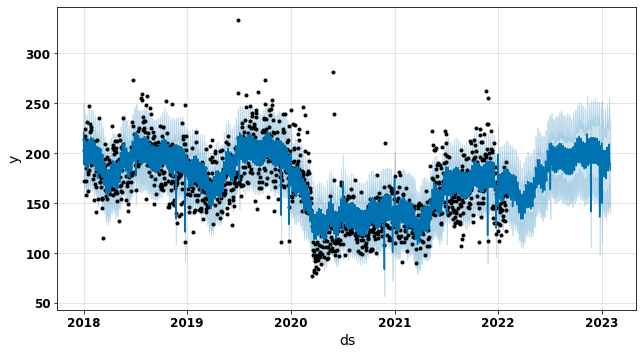

In [197]:
fig1 = prophet_forecaster_object.plot(train_forecast_df)

In [198]:
df_prophet.dtypes

ds    object
y      int64
dtype: object

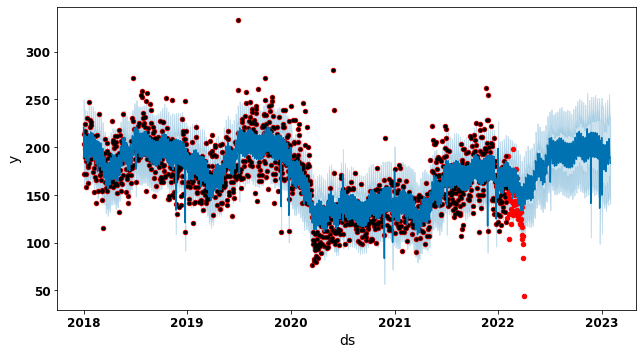

In [204]:
import warnings
warnings.filterwarnings('ignore')
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
prophet_forecaster_object.plot(train_forecast_df)
df_prophet.plot.scatter(x="ds", y="y", color="red", ax=plt.gca())
plt.show()

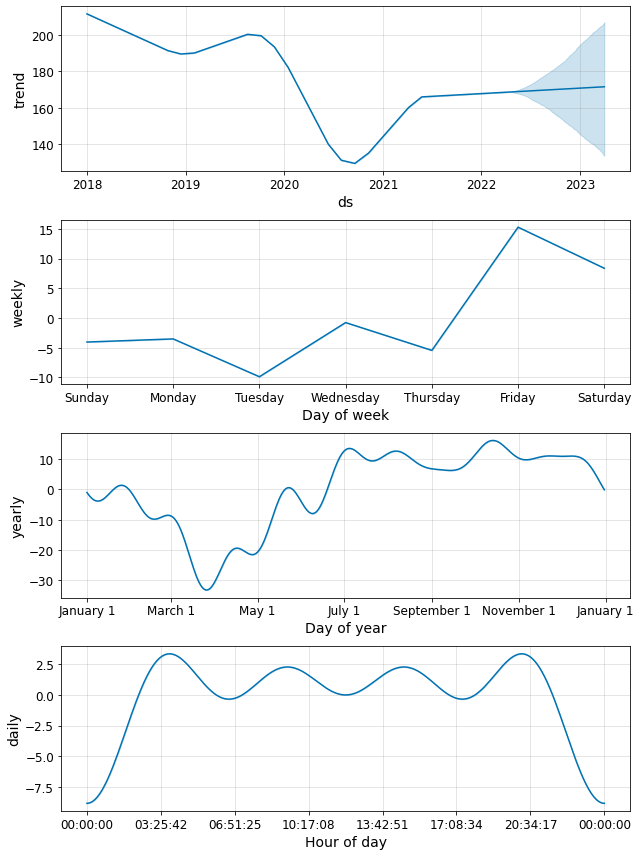

In [105]:
fig2 = prophet_forecaster_object.plot_components(forecast)
